In [1]:
import numpy as np
import gym
import gym_crumb
from math import radians

In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

In [3]:
env = gym.make("crumb-v0")

WARN: Environment '<class 'gym_crumb.envs.crumb_env.CrumbEnv'>' has deprecated methods. Compatibility code invoked.


In [4]:
from expected_value_sarsa import EVSarsaAgent
agent = EVSarsaAgent(alpha=0.5,epsilon=0.25,discount=0.99)

In [5]:
def play_and_train(env,agent,t_max=10**4):

    total_reward = 0.0
    s = env.reset()
    r = 0
    #env.step((3, radians(0)))
    for t in range(t_max):
        a = agent.getAction(tuple(s))#<get agent to pick action given state s>
        
        next_s,r, done = env.step(a)
        
        agent.update(tuple(s), a, tuple(next_s), r)#<train (update) agent for state s>
        
        s = next_s
        total_reward +=r
        if done:
            agent.epsilon = agent.epsilon * 0.8
            print agent.epsilon
            break
    return total_reward

0.2
mean reward -40.0


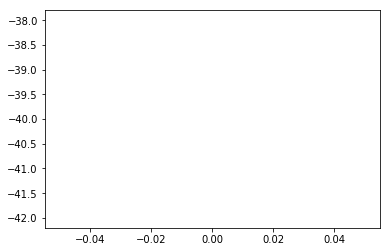

0.16
0.128
0.1024
0.08192
0.065536
mean reward -27.0


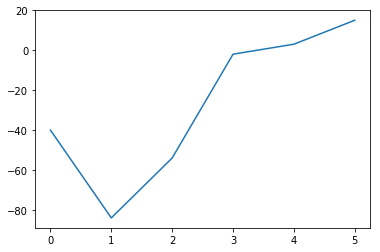

0.0524288
0.04194304
0.033554432
0.0268435456
0.02147483648
mean reward -8.27272727273


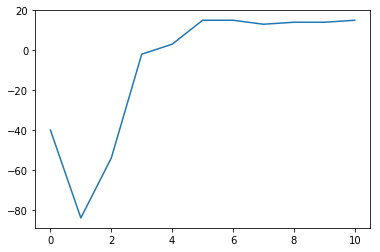

0.017179869184
0.0137438953472
0.0109951162778
0.00879609302221
0.00703687441777
mean reward -1.0


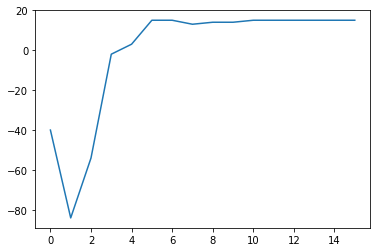

0.00562949953421
0.00450359962737
0.0036028797019
0.00288230376152
0.00230584300921
mean reward 2.71428571429


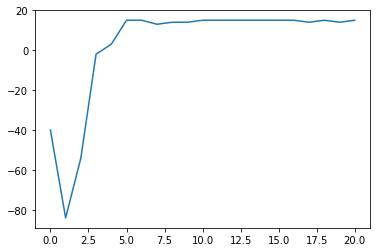

KeyboardInterrupt: 

In [6]:
rewards = []
for i in range(100):
    rewards.append(play_and_train(env,agent))    
    if i %5 ==0:
        print "mean reward",np.mean(rewards[-50:])
        plt.plot(rewards)
        plt.show()